<font size="3">Table of Contents</font>
<div id="toc"></div>

# Free Vibration

<p style="text-align:center">
	<img src="http://shared.crawlab.org/MassSpringDamper_FreeVibration.png" alt="A Mass-Spring-Damper System" width=50%/></a><br>
    <strong> Figure 1: A Mass-Spring-Damper System </strong>
</p>

This notebook simluates the free vibration of a simple mass-spring-damper system like the one shown in Figure 1. More specifically, we'll look at how system response to non-zero initial conditions. 

The equation of motion for the system is:

$ \quad m \ddot{x} + c \dot{x} + kx = 0 $

We could also write this equation in terms of the damping ratio, $\zeta$, and natural frequency $\omega_n$.

$ \quad \ddot{x} + 2\zeta\omega_n\dot{x} + \omega_n^2x = 0$

For information on how to obtain this equation, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

We'll use the solution to the differential equation that we developed in class to plot the response. The solution for the underdamped case is:

$ \quad x(t) = e^{-\zeta\omega_nt}\left(a_1 e^{i \omega_d t} + a_2 e ^{-i \omega_d t}\right) $ 

*or*

$ \quad x(t) = e^{-\zeta\omega_nt}\left(b_1 \cos{\omega_d t} + b_2 \sin{\omega_d t}\right) $

To use this equation, we need to solve for $a_1$ and $a_2$ or $b_1$ and $b_2$ using the initial conditions. Here, let's use the sin/cosine form. Solving the equation for generic intial velocity, $\dot{x} = v_0$, and a generic initial displacement, $x = x_0$, we find:

$ \quad x(t) = e^{-\zeta\omega_nt}\left(x_0 \cos{\omega_d t} + \frac{\zeta \omega_n x_0 + v_0}{\omega_d} \sin{\omega_d t}\right) $

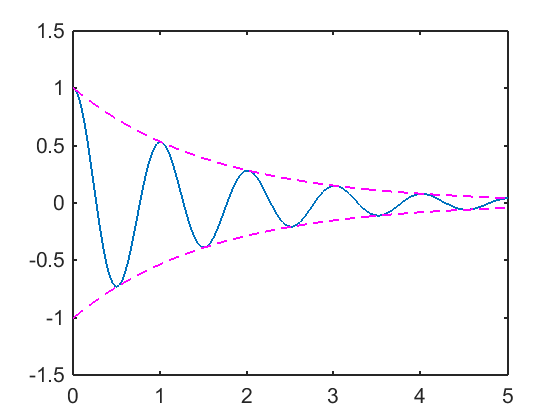

In [14]:
% Define the System Parameters
m = 1;                    % kg
k = (2*pi)^2;             % N/m (Selected to give an undamped natrual frequency of 1Hz)
wn = sqrt(k/m);           % Natural Frequency (rad/s)

z = 0.1;                  % Define a desired damping ratio
c = 2*z*wn*m;             % calculate the damping coeff. to create it (N/(m/s))

wd = wn*sqrt(1 - z^2);    % Damped natural frequency (rad/s)

t = linspace(0,5,501);
x0 = [1, 0];

x = exp(-z*wn*t).*(x0(1)*cos(wd*t) + (z*wn*x0(1) + x0(2))/wd*sin(wd*t));

amp = sqrt(x0(1)^2 + ((z*wn*x0(1) + x0(2))/wd).^2);
decay_env = amp.*exp(-z*wn*t);

plot(t,x), hold on
plot(t,decay_env,'--m')
plot(t,-decay_env,'--m'), hold off


# Step Input

<p style="text-align:center">
	<img src="http://shared.crawlab.org/MassSpringDamper_Seismic_Horiz.png" alt="A Mass-Spring-Damper System" width=50%/></a><br>
    <strong> Figure 1: A Mass-Spring-Damper System </strong>
</p>

This notebook simluates a step response of a simple mass-spring-damper system like the one shown in Figure 1. We will also be using some functions from the [Python Control Systems Toolbox](https://www.cds.caltech.edu/~murray/wiki/Control_Systems_Library_for_Python).

The equation of motion for the system is:

$ \quad m \ddot{x} + c \dot{x} + kx = c \dot{y} + ky $

We could also write this equation in terms of the damping ratio, $\zeta$, and natural frequency, $\omega_n$.

$ \quad \ddot{x} + 2\zeta\omega_n\dot{x} + \omega_n^2x = 2\zeta\omega_n \dot{y} + \omega_n^2 y$

For information on how to obtain this equation, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

We'll start by using the solution to the differential equation that we developed in class to plot the response. The solution for the underdamped case with zero initial conidtions is:

$ \quad x(t) = c + e^{-\zeta\omega_nt}\left(-c \cos{\omega_d t} - \frac{\zeta c}{\sqrt{1-\zeta^2}} \sin{\omega_d t}\right) $

where $c$ is the desired step size, and $\omega_d = \omega_n \sqrt{1 - \zeta^2}$ is the damped natural frequency.

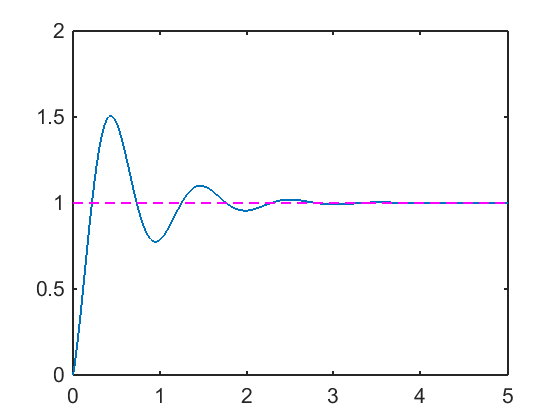

In [19]:
% Define the System Parameters
m = 1;                    % kg
k = (2*pi)^2;             % N/m (Selected to give an undamped natrual frequency of 1Hz)
wn = sqrt(k/m);           % Natural Frequency (rad/s)

z = 0.25;                  % Define a desired damping ratio
c = 2*z*wn*m;             % calculate the damping coeff. to create it (N/(m/s))

wd = wn*sqrt(1 - z^2);    % Damped natural frequency (rad/s)

t = linspace(0,5,501);
y_step = 1;

x = y_step + exp(-z*wn*t).*(-y_step*cos(wd*t) + (z*y_step)/(sqrt(1-z^2)).*sin(wd*t));

plot(t,x), hold on
plot(t,ones(size(t)),'--m')
hold off


## Using the Control System Toolbox
We can also simluate responses using the [Python Control Systems Library](http://www.cds.caltech.edu/~murray/wiki/Control_Systems_Library_for_Python). To do so, we'll use the transfer function form of the equations of motion. If you've had controls, you probably spent a lot of time working with transfer functions. If not, we'll learn more about them later. For now, just think of a transfer function as an experssion of how the input is "transferred" to the output.

In [22]:
% Define the system to use in simulation - in transfer function form here
num = [2*z*wn, wn^2];
den = [1, 2*z*wn, wn^2];

sys = tf(num,den);

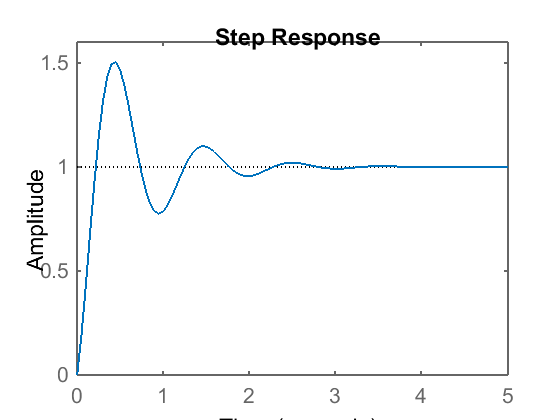

In [26]:
step(sys,5)

# Undamped Response to Harmonic Seismic Inputs

<p style="text-align:center">
	<img src="http://shared.crawlab.org/MassSpring_Seismic_Horiz.png" alt="A Mass-Spring-Damper System" width=50%/></a><br>
    <strong> Figure 1: A Mass-Spring System </strong>
</p>

This notebook examines the frequency response of a simple mass-spring system like the one shown in Figure 1. It has a position input, $ y(t) $, that is known to be harmonic connected to the mass, $ m $, via a spring of stiffness $ k $. The position of the mass is defined by $ x(t) $.

The equation of motion for the system is:

<!-- the \quad commmand just adds a space in the math mode -->
$ \quad m \ddot{x} + kx = ky $

We could also write this equation in terms of the damping ratio, $\zeta$, and natural frequency, $\omega_n$.

$ \quad \ddot{x} + \omega_n^2x = \omega_n^2 y$

For information on how to obtain this equation, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

Let's use the closed-form, steady-state solution we developed in lecture:

Assume:

$ \quad y(t) = \bar{y} \sin{\omega t} $

Then, the solution $x(t)$ should have the form:

$ \quad x(t) = a \sin{\omega t} + b \cos{\omega t} $

We saw that when we substituted this assumed solution into the equations of motion for this undamped system, the $b$ constant was elimiinated, leaving:

$ \quad x(t) = \frac{\omega_n^2}{\omega_n^2 - \omega^2}\bar{y} \sin{\omega t} $

or 

$ \quad x(t) = \frac{\omega_n^2}{\omega_n^2 - \omega^2} y(t) $

So, $ \frac{\omega_n^2}{\omega_n^2 - \omega^2} $ gives us the relationship between the input $ y(t) $ and the system response $ x(t) $. Let's plot that for a range of frequencies.

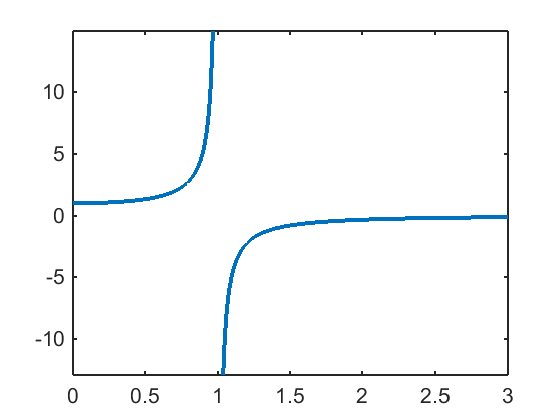

In [36]:
% Define the System Parameters
m = 1;                    % kg
k = (2*pi)^2;             % N/m (Selected to give an undamped natrual frequency of 1Hz)
wn = sqrt(k/m);           % Natural Frequency (rad/s)

z = 0.1;                  % Define a desired damping ratio
c = 2*z*wn*m;             % calculate the damping coeff. to create it (N/(m/s))

wd = wn*sqrt(1 - z^2);    % Damped natural frequency (rad/s)

w = linspace(0,3*wn,501);
x_amp = (wn^2)./(wn^2 - w.^2);


pos = find(abs(x_amp) >= 15);
x_amp(pos) = nan;
w(pos) = nan;

plot(w/wn,x_amp,'linewidth',2), axis tight

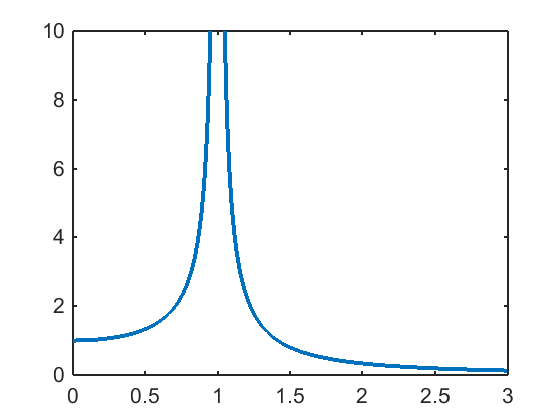

In [38]:
x_mag = abs(x_amp);
plot(w/wn,x_mag,'linewidth',2), axis tight
ylim([0,10])

# Undamped Response to Harmonic Seismic Inputs

Let's use the closed-form, steady-state solution we developed in lecture:

Assume:

$ \quad y(t) = \bar{y} \sin{\omega t} $

Then, the solution $x(t)$ should have the form:

$ \quad x(t) = a \sin{\omega t} + b \cos{\omega t} $

We saw that when we substituted this assumed solution into the equations of motion for this undamped system, the $b$ constant was elimiinated, leaving:

$ \quad x(t) = \frac{\omega_n^2}{\omega_n^2 - \omega^2}\bar{y} \sin{\omega t} $

or 

$ \quad x(t) = \frac{\omega_n^2}{\omega_n^2 - \omega^2} y(t) $

So, $ \frac{\omega_n^2}{\omega_n^2 - \omega^2} $ gives us the relationship between the input $ y(t) $ and the system response $ x(t) $. <br><br>

## Transfer Function Form
We can then write the transfer function (which represents the "tranformation" of the input to the output) as:

$ \quad \frac{\mbox{Output}}{\mbox{Input}} \equiv \frac{x(t)}{y(t)} = \frac{\omega_n^2}{\omega_n^2 - \omega^2} $

So our transfer funciton is then:

$ \quad G(\omega) = \frac{\omega_n^2}{\omega_n^2 - \omega^2} $

We can also normalize this according to $ \Omega = \frac{\omega}{\omega_n} $:

$ \quad G(\Omega) = \frac{1}{1 - \Omega^2} $

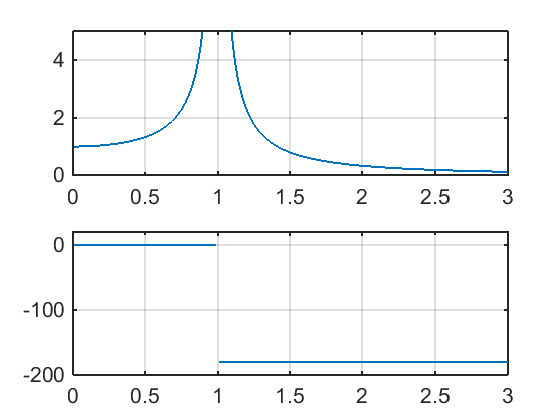

In [53]:
% Set up input parameters
wnorm = linspace(0.01,3,1000);            % Frequency range for freq response plot, 0-3x wn with 1000 points in-between

TFnorm_amp = 1./(1 - wnorm.^2);

% Let's mask the discontinuity, so it isn't plotted
pos = find(abs(TFnorm_amp) >= 50);
TFnorm_amp(pos) = nan;
wnorm(pos) = nan;

% Now define the magnitude and phase of this TF
TFnorm_mag = sqrt(TFnorm_amp.^2);
TFnorm_phase = -atan2(0,TFnorm_amp);

subplot(2,1,1), plot(wnorm,TFnorm_mag), ylim([0,5]); grid on
subplot(2,1,2), plot(wnorm,TFnorm_phase*180/pi), ylim([-200,20]); grid on

# Frequecy Response of a Mass-Spring-Damper System <br> to Harmonic Seismic (Position) Inputs

<p style="text-align:center">
	<img src="http://shared.crawlab.org/MassSpringDamper_Seismic_Horiz.png" alt="A Mass-Spring-Damper System" width=50%/></a><br>
    <strong> Figure 1: A Mass-Spring-Damper System </strong>
</p>

This notebook looks at the frequency response of a simple mass-spring-damper system like the one shown in Figure 1.

The equation of motion for the system is:

$ \quad m \ddot{x} + c \dot{x} + kx = c \dot{y} + ky $

We could also write this equation in terms of the damping ratio, $\zeta$, and natural frequency, $\omega_n$.

$ \quad \ddot{x} + 2\zeta\omega_n\dot{x} + \omega_n^2x = 2\zeta\omega_n \dot{y} + \omega_n^2 y$

For information on how to obtain this equation, you can see the lectures at the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

We can define the normalized transfer function as:

$ \quad G(\Omega) = \sqrt{\frac{1 + (2\zeta\Omega)^2}{(1-\Omega^2)^2 + (2\zeta\Omega)^2}} e^{i \phi} $

where

$ \quad \phi = \tan^{-1}\left({2\zeta\Omega}\right) - \tan^{-1}\left({\frac{2\zeta\Omega}{1-\Omega^2}}\right)$

Let's plot the magnitude and phase of this for a few different damping ratios

In [63]:
% Define the System Parameters
m = 1;                    % kg
k = (2*pi)^2;             % N/m (Selected to give an undamped natrual frequency of 1Hz)
wn = sqrt(k/m);           % Natural Frequency (rad/s)

z = 0.25;                  % Define a desired damping ratio
c = 2*z*wn*m;             % calculate the damping coeff. to create it (N/(m/s))

wd = wn*sqrt(1 - z^2);    % Damped natural frequency (rad/s)

w = linspace(0,20,2000);
z = 0;
mag_normal_un = sqrt((1+(2*z*w).^2)./((1-w.^2).^2+(2*z*w).^2));
phase_un = (atan2(2*z*w,1) - atan2((2*z*w),(1-w.^2)))*180/pi;
pos = find(abs(1-w) <= 1e-2);
phase_un(pos) = nan;

z = 0.1;
mag_normal_0p1 = sqrt((1+(2*z*w).^2)./((1-w.^2).^2+(2*z*w).^2));
phase_0p1 = (atan2(2*z*w,1) - atan2((2*z*w),(1-w.^2)))*180/pi;

z = 0.2;
mag_normal_0p2 = sqrt((1+(2*z*w).^2)./((1-w.^2).^2+(2*z*w).^2));
phase_0p2 = (atan2(2*z*w,1) - atan2((2*z*w),(1-w.^2)))*180/pi;

z = 0.4;
mag_normal_0p4 = sqrt((1+(2*z*w).^2)./((1-w.^2).^2+(2*z*w).^2));
phase_0p4 = (atan2(2*z*w,1) - atan2((2*z*w),(1-w.^2)))*180/pi;


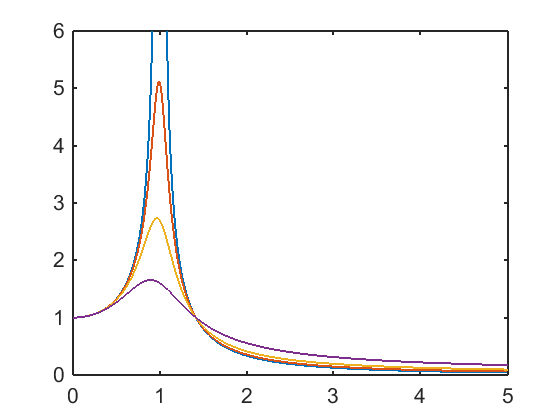

In [64]:
plot(w,mag_normal_un), hold on
plot(w,mag_normal_0p1)
plot(w,mag_normal_0p2)
plot(w,mag_normal_0p4), hold off
axis([0,5,0,6])

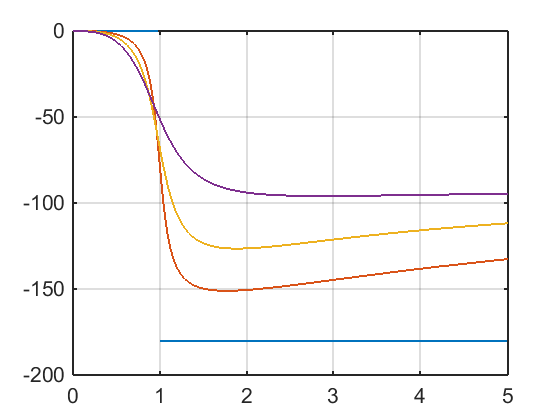

In [72]:
plot(w,phase_un), hold on
plot(w,phase_0p1)
plot(w,phase_0p2)
plot(w,phase_0p4), hold off
axis([0,5,-200,0]), grid on

# Fourier Analysis

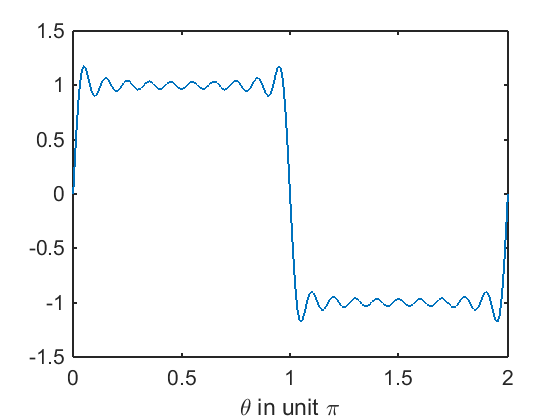

In [74]:
N = 2^8;
x = zeros(1,N);
theta = linspace(0,2*pi,N);

for n = 1:2:20
    x = x + 4/(pi*n)*sin(n*theta);
end

plot(theta/pi,x), xlabel('\theta in unit \pi')

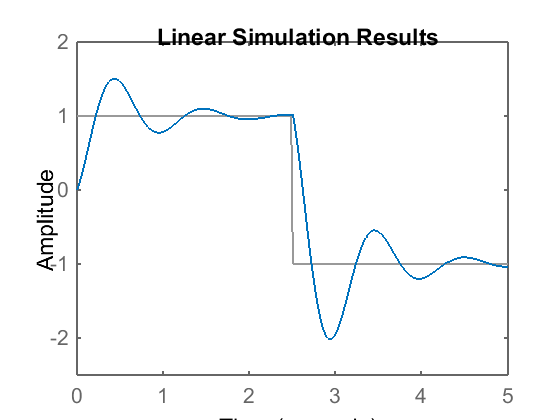

In [84]:
% Define the System Parameters
m = 1;                    % kg
k = (2*pi)^2;             % N/m (Selected to give an undamped natrual frequency of 1Hz)
wn = sqrt(k/m);           % Natural Frequency (rad/s)

z = 0.25;                  % Define a desired damping ratio
c = 2*z*wn*m;             % calculate the damping coeff. to create it (N/(m/s))

wd = wn*sqrt(1 - z^2);    % Damped natural frequency (rad/s)

t = linspace(0,5,2^8);
u = zeros(size(t));
u(1:2^7) = 1;
u(2^7+1:end) = -1;

num = [2*z*wn, wn^2];
den = [1, 2*z*wn, wn^2];

sys = tf(num,den);
lsim(sys,u,t);
xout_exact = lsim(sys,u,t);

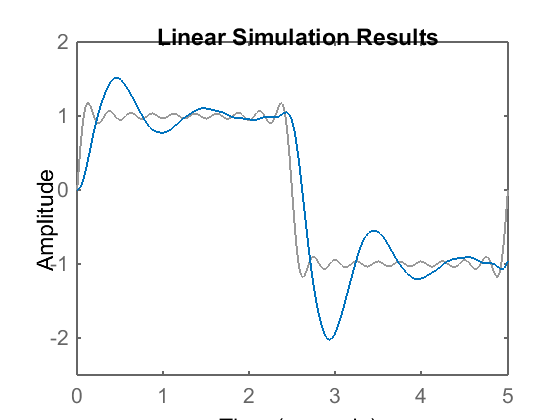

In [85]:
lsim(sys,x,t)
xout_approx = lsim(sys,x,t);

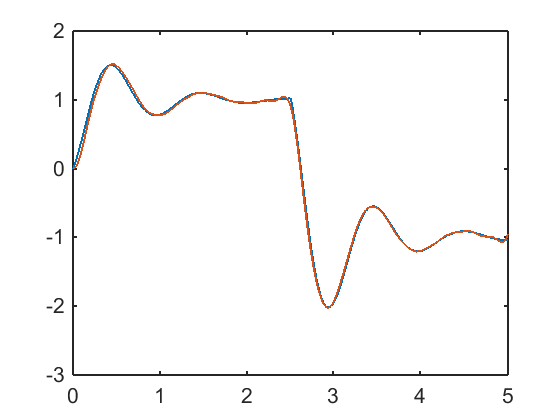

In [149]:
plot(t,xout_exact,t,xout_approx)

In [9]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>